# Preamble
The codeblocks below are there to important the right packages, provide some helper functions, and hardcode a number of often used values. If you find yourself needed to make adjustments to these codeblocks to make the code work, please let us know as this most likely means that something has gone wrong in our implementation.

In [ ]:
import torch
import numpy as np

import torch.distributions as D

In [ ]:
def reset_seeds(seed=42):
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.backends.cudnn.deterministic = True
  np.random.seed(seed)

# Number of samples used for MC integration
N = 1000000

# Administrative Information
Below you will find the code assignment accompanying our second day of lecturing. In the following 3 weeks we will be publishing an assignment like this (almost) every day with the purpose of strengthening your understanding of the concepts and to build some intuition around them. None of the tasks set are supposed to be extremely challenging and if you do run into any problems, chances are high that this is due to unclarity on our side. As such, if you are stuck on a task for a longer time (15+ minutes), do please reach out to lars@aims.ac.za

For the submission of the code at the end of the week, we suggest to save a copy to your own drive and work from there.

The notebooks are roughly structured as follows:
- Coding tasks and questions are mixed together and are highlighted by the keyword: "**Task**".
- Depending on what the task is acking for, the task will be followed by either a codeblock containing some pre-writen helper code and a `#Todo` flag after which you can add your implementation, or a markdown block containing the keyword "*Answer:*" for you to provide your answer.
- Some tasks are followed by a "**Hint:**" which will contain some extra instructions for the coding implementations, or it might point you towards the right answer to a question.
- At the end of each notebook we will have a short section with additional challenging extensions that you could choose to work on if you found a topic interesting. Please note that you are not required to do these extensions. Solving one or more of the extensions does **not** by definition result in a higher grade for the course.

Lastly, to help us in improving the coding assignments in the following weeks, please fill in the anonymous feedback [form](https://forms.gle/vVBXm7nhW94yMkHr8). We highly appreciate your feedback, positive and negative!

# Expected Energy, Entropy and Free-Energy
During yesterdays and todays lecture the concepts of Expected Energy, Entropy and Free-Energy were mentiond a number of times. These are fundamental concepts in the realm of Statistical Physics, and, as we will highlight throughout the rest of this course, also play a central role in Machine Learning. Having a clear understanding of how these key concepts are defined will thus be an important step in building intuition about the relationships between the two fields that we will be exploring.

The following coding tasks and related questions are designed to help build that understanding. But first, we will restate their definitions here;

*Note: As we observed during the lecture, there was a sign error in these equations. Updates as of 27 March 2024 5:30pm*


**Internal Energy / Expected Energy**
$$
{U}[p] =  \int dx p(x) {H}(x)
$$

**Entropy**
$$
S[p] = - \int dx p(x) \log p(x)
$$

**Free-Energy**
$$
{F}[p] = U[p] - T {S}[p]
$$

For the purpose of this assignent we can ignore the temperature and set $T = 1$.

## Task 1.1: Implement U, S and F
With the definitions given above, our first step in building intuition of these concepts is to implement them and to see how they change depending on the choise of distribution $\rho$ and Hamiltonian ${H}$.

> **Task**: In the codeblock below, we have given the skeletons of three functions to calculate the Internal Energy, the Entropy and the Free-Energy, respectively. It's your task to implement the definitions above using a Monte Carlo approximations.

**Hint:** If you shortly look at the codeblock below, you will see that the argument passed to the distribution parameter is a [torch.distribution](https://pytorch.org/docs/stable/distributions.html) object. You can therefore assume in your implementation that you can sample from this distribution using the `p.sample((N,))`. For the purpose of this codebook, we have hardcoded `N = 1000`. This should suffice to get accurate estimates.

In [ ]:
def U(p, H):
  samples = p.sample((N,))
  U=H(samples).mean()
  # TODO
  return U

def S(p):
  samples = p.sample((N,))
  S=-torch.log(p.log_prob(samples).exp()).mean()
  # TODO
  return S

def F(p, H):
  u=U(p, H)
  s=S(p)
  F=u-s
  return F

**Checkpoint**: We will need the code you have created above throughout the rest of the practical. Please run the code below to see if your implementation is correct. You should get the following output:

```
tensor(0.8666)
tensor(0.6931)
tensor(0.1735)
```

In [ ]:
reset_seeds()

double_well_potential = lambda x: -x**2 + x**4 + 1
uniform_distribution = D.Uniform(-1, 1)

internal_energy = U(uniform_distribution, double_well_potential)
entropy = S(uniform_distribution)
free_energy = F(uniform_distribution, double_well_potential)

print(internal_energy)
print(entropy)
print(free_energy)

tensor(0.8666)
tensor(0.6931)
tensor(0.1735)


## Task 1.2: Calculating U, S and F for different hamiltonians
Now that we have implemented functions for calculating the internal energy (U), the entropy (S), and the Free-Energy(F), we are going to consider two different Hamiltonians and see how they differ. The two Hamiltonians that we consider will be;
- Harmonic Potential: ${H}(x) = b(x-a)^2$
- Double Well Potential: ${H}(x) = x^4 - x^2$

In the next weeks we will see these Hamiltonians pop up a number of times.

We have implemented these Hamiltonians below and plotted them for different values of a and b.

> **Task**: Intuitively, how do you think the choise for a and b will impact the internal energy, the entropy and the Free-Energy?

*Answer:*
The Harmonic potential is directly proportionnal to '$b\ $'; '$\ a$' indicates the equilibruim position of the system (i.e at x=a, the system has the lowest potential energy).the Harmonic potential increase quadratically with '$b$'.

So, the larger the parameter '$b$' the higher the internal energy of the system.Therefore the free-energy of the system will be more likely to increase according to how disperse the energy of the system is (Entropy).

As '$a$' controls the location of the equilibruim position and determine the wideness of the U-shape , it will also contribute on increasing the internal energy and therefore the Free-energy.

However, $a$ and $b$ will not directly affect the Entropy.


In [ ]:
def harmonic_potential(a, b):
  return lambda x: b * (x - a)**2

def double_well_potential():
  return lambda x: -x**2 + x**4

(-2.0, 2.0)

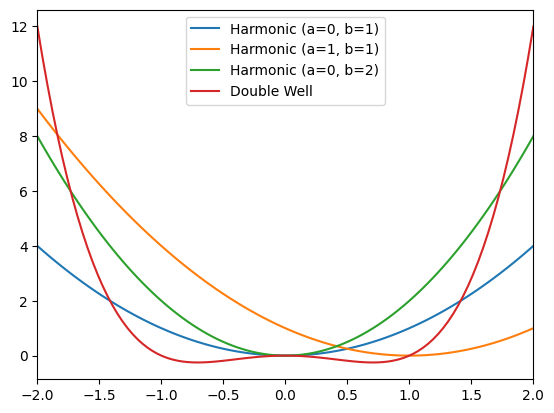

In [ ]:
import matplotlib.pyplot as plt
import torch

xs = torch.linspace(-2, 2, 100)

ys_0_1 = harmonic_potential(0, 1)(xs)
ys_1_1 = harmonic_potential(1, 1)(xs)
ys_0_2 = harmonic_potential(0, 2)(xs)
ys_double = double_well_potential()(xs)


plt.plot(xs, ys_0_1, label='Harmonic (a=0, b=1)')
plt.plot(xs, ys_1_1, label='Harmonic (a=1, b=1)')
plt.plot(xs, ys_0_2, label='Harmonic (a=0, b=2)')
plt.plot(xs, ys_double, label='Double Well')
plt.legend()
plt.xlim(-2, 2)

> **Task**: Using a simple Gaussian Distribution with zero mean and unit variance, try to answer the following questions about how Internal Energy, Entropy and Free-Energy change for different Hamiltonians. For each question, try to provide a seperate code-block with a small experiment that validates your answer. Or, if possible, try to give an explanation.
- Comparing a standard Harmonic Potential (a=0, b=1) with the double well potential, which one has the lowest Internal Energy, Entropy and Free-Energy?
- For the Harmonic Potential, what happens to the Internal Energy, Entropy and Free-Energy when we change the center of the trap (change a)?
- For the Harmonic Potential, what happens to the Internal Energy, Entropy and Free-Energy when we change the scaling of the trap (change b)?
- How, if at all possible, would we need to change the Hamiltonian to change the Entropy?

**Hint:** The short codeblock below shows how to calculate the free-energy with the Gaussian Distribution and the Harmonic Potential. Try to replicate this a number of times for different values of a and b.

*Answer:* \<Answer goes here>


1.   The standard Harmonic Potential has the Lowest Internal Energy and Free-energy. However both have roughly the same Entropy.
2.   When we increase the center of the trap '$a$'  for the Harmonic potential , the Internal energy and the free-energy become larger as well. they increase fastly. However the Entropy is not significantly affected by the changing of this parameter.
3. The larger the scaling parameter '$b$' the higher the Internal energy and the free energy, but both quantities in this case increase slowly.Once again, the Entropy is not affected by the scaling parameter.
4. The Entropy depend on the degree of desorder in the system model by the Gaussian distribution in our case. Therefore the change in hamiltonian does not affect the Entropy. For the Hamiltonian to affect the Entropy, the distribution used must depend of it, in oder world we should used the *Botzmann distribution*.



In [ ]:
#@title standard Harmonic Potential (a=0, b=1) vs the double well
a = 0
b = 1
distribution = D.Normal(0, 1)
#internal energy Harmonic potential
print(f"internal energy Harmonic potential={U(p=distribution, H=harmonic_potential(a, b))}")
print('')
#entropy Harmonic potential
print(f"entropy Harmonic potential={S(distribution)}")
print('')
# Free-energy harmonic potential
print(f"Free-energy harmonic potential={ F(distribution, harmonic_potential(a, b))}")
print('')

#internal energy Double well potential
print(f"internal energy double well={U(p=distribution, H=double_well_potential())}")
print('')
#entropy Double well potential
print(f"entropy double well ={S(distribution)}")
print('')
# Free-energy double well potential
print(f"Free-energy double well ={ F(distribution, double_well_potential())}")

# TODO

internal energy Harmonic potential=0.9996252059936523

entropy Harmonic potential=1.4182628393173218

Free-energy harmonic potential=-0.4199320077896118

internal energy double well=1.999763011932373

entropy double well =1.4191465377807617

Free-energy double well =0.5765870809555054


In [ ]:
#@title varying the equilibruim position ( center of the trap ) a : (interactive slider) {run: "auto"}
a = 3 #@param{type:"slider", min:0, max:10, step:1}
b = 1
distribution = D.Normal(0, 1)
#internal energy Harmonic potential
print(f"internal energy Harmonic potential= {U(p=distribution, H=harmonic_potential(a, b))}")
print('')
#entropy Harmonic potential
print(f"entropy Harmonic potential= {S(distribution)}")
print('')
# Free-energy harmonic potential
print(f"Free-energy harmonic potential= { F(distribution, harmonic_potential(a, b))}")
print('')

internal energy Harmonic potential= 10.004199981689453

entropy Harmonic potential= 1.4201756715774536

Free-energy harmonic potential= 8.576509475708008



In [ ]:
#@title varying the scale of the trap ( change b ) :(interactive slider)  {run: "auto"}
a = 0
b = 6 #@param{type:"slider", min:1, max:10, step:1}
distribution = D.Normal(0, 1)
#internal energy Harmonic potential
print(f"internal energy Harmonic potential= {U(p=distribution, H=harmonic_potential(a, b))}")
print('')
#entropy Harmonic potential
print(f"entropy Harmonic potential= {S(distribution)}")
print('')
# Free-energy harmonic potential
print(f"Free-energy harmonic potential= { F(distribution, harmonic_potential(a, b))}")
print('')

internal energy Harmonic potential= 6.999293804168701

entropy Harmonic potential= 1.4186280965805054

Free-energy harmonic potential= 5.578008651733398



## Task 1.3: Calculating U, S and F for different probability distributions
In the previous step we have kept the probability distribution fixed while we experimented with different Hamiltonians. Now, instead, we will be experimenting with different probability distributions while we keep the hamiltonian fixed and see how the internal energy, entropy and free-energy change. For this purpose, we will first consider the standard Harmonic potential with a=0 and b=1.

> **Task**: Consider a Gaussian distribution with mean $\mu$ and variance $\sigma^2$. Try to answer the following questions about how Internal Energy, Entropy and Free-Energy change for different values of $\mu$ and $\sigma^2$ while we keep a=0 and b=1 fixed for the Harmonic potential. For each question, try to provide a seperate code-block with a small experiment that validates your answer. Or, if possible, try to give an explanation.
- What happens to the Internal Energy, Entropy and Free-Energy when we change the mean $\mu$?
- What happens to the Internal Energy, Entropy and Free-Energy when we change the variance $\sigma$?

*Answer:*
1. As the mean $\mu$ get closer to zero, both the Internal energy and the free-energy decrease ( the free-energy become negative).; conversely, when the mean moves away from zero, they both increase. The entropy does not change very much however; it roughly the same.

2. increase the  variance $\sigma$ result to and to an increasing of the Internal energy, Entropy energy as well as the free-energy.

In [ ]:
#@title varying the mean of the Gaussian distribution: (interactif slider)  {run:"auto"}
mu = 1.4 # @param{type:"slider", min:-3, max:3, step:0.1}
sigma= 1
distribution = D.Normal(mu, sigma)
potential = harmonic_potential(0, 1)
#internal energy Harmonic potential
print(f"internal energy Harmonic potential={U(p=distribution, H=potential)}")
print('')
#entropy Harmonic potential
print(f"entropy Harmonic potential={S(distribution)}")
print('')
# Free-energy harmonic potential
print(f"Free-energy harmonic potential={ F(distribution,potential)}")
print('')

# Todo

internal energy Harmonic potential=2.9607226848602295

entropy Harmonic potential=1.4183495044708252

Free-energy harmonic potential=1.5414189100265503



In [ ]:
#@title varying the scale $\sigma$ of the Gaussian distribution: (interactif slider)  {run:"auto"}
mu = 0
sig=3.9 #@param{type:"slider", min:1, max:5, step:0.1}
distribution = D.Normal(mu, sig)
potential = harmonic_potential(0, 1)
#internal energy Harmonic potential
print(f"internal energy Harmonic potential={U(p=distribution, H=potential)}")
print('')
#entropy Harmonic potential
print(f"entropy Harmonic potential={S(distribution)}")
print('')
# Free-energy harmonic potential
print(f"Free-energy harmonic potential={ F(distribution,potential)}")
print('')

internal energy Harmonic potential=15.228128433227539

entropy Harmonic potential=2.779956579208374

Free-energy harmonic potential=12.418756484985352



## Extensions
If you want to explore the topics discussed in this assignment further, consider looking at one of the below variations of the assigment:
- So far we have only considered 1-dimensional Hamiltonians and probability distributions. How would you change the code to also work for 2-dimensional, or even higher dimensional, problems?